<a href="https://colab.research.google.com/github/jkabila/Machine-learning/blob/main/KMeans_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librarys**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import statsmodels as sm
from scipy import stats
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# **Data frame**

In [ ]:
data=pd.read_csv("/content/Quote-Equity-TATACONSUM-EQ-23-03-2023-to-23-03-2024.csv")
data

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,22-Mar-2024,EQ,"1,133.95","1,140.00","1,119.00","1,133.95","1,123.70","1,122.75","1,125.02","1,269.00",690.0,"16,96,377","1,90,84,58,611.45","70,308"
1,21-Mar-2024,EQ,"1,134.00","1,138.95","1,121.50","1,124.05","1,136.00","1,133.95","1,132.27","1,269.00",690.0,"19,01,034","2,15,24,83,099.90","73,465"
2,20-Mar-2024,EQ,"1,143.10","1,153.40","1,111.70","1,146.25","1,122.45","1,124.05","1,125.25","1,269.00",690.0,"20,70,193","2,32,94,92,196.45","1,04,758"
3,19-Mar-2024,EQ,"1,184.90","1,184.90","1,139.85","1,186.95","1,149.75","1,146.25","1,152.80","1,269.00",690.0,"21,52,306","2,48,11,88,386.65","1,09,316"
4,18-Mar-2024,EQ,"1,213.05","1,217.65","1,184.30","1,212.15","1,188.50","1,186.95","1,192.65","1,269.00",690.0,"8,03,158","95,78,82,939.25","37,164"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,29-Mar-2023,EQ,696.05,703.00,694.80,696.05,698.00,697.55,698.82,861.15,686.6,"11,60,832","81,12,09,026.45","45,247"
245,28-Mar-2023,EQ,690.00,699.65,690.00,699.35,696.00,696.05,696.35,861.15,686.6,"11,13,702","77,55,27,738.05","31,594"
246,27-Mar-2023,EQ,706.90,707.40,697.20,702.35,697.45,699.35,705.43,861.15,686.6,"36,95,292","2,60,67,76,976.20","32,804"
247,24-Mar-2023,EQ,707.00,709.70,698.85,707.15,701.10,702.35,703.36,861.15,686.6,"9,60,470","67,55,56,293.65","30,789"


# **Data processing**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           249 non-null    object 
 1   series         249 non-null    object 
 2   OPEN           249 non-null    object 
 3   HIGH           249 non-null    object 
 4   LOW            249 non-null    object 
 5   PREV. CLOSE    249 non-null    object 
 6   ltp            249 non-null    object 
 7   close          249 non-null    object 
 8   vwap           249 non-null    object 
 9   52W H          249 non-null    object 
 10  52W L          249 non-null    float64
 11  VOLUME         249 non-null    object 
 12  VALUE          249 non-null    object 
 13  No of trades   249 non-null    object 
dtypes: float64(1), object(13)
memory usage: 27.4+ KB


In [ ]:
print(data.columns)

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')


In [ ]:
data.set_index("Date ",inplace=True)

In [ ]:
data.drop(["series "],axis=1,inplace=True)

In [ ]:
data

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,
22-Mar-2024,1133.95,1140.00,1119.00,1133.95,1123.70,1122.75,1125.02,1269.00,690.0,"16,96,377","1,90,84,58,611.45","70,308"
21-Mar-2024,1134.00,1138.95,1121.50,1124.05,1136.00,1133.95,1132.27,1269.00,690.0,"19,01,034","2,15,24,83,099.90","73,465"
20-Mar-2024,1143.10,1153.40,1111.70,1146.25,1122.45,1124.05,1125.25,1269.00,690.0,"20,70,193","2,32,94,92,196.45","1,04,758"
19-Mar-2024,1184.90,1184.90,1139.85,1186.95,1149.75,1146.25,1152.80,1269.00,690.0,"21,52,306","2,48,11,88,386.65","1,09,316"
18-Mar-2024,1213.05,1217.65,1184.30,1212.15,1188.50,1186.95,1192.65,1269.00,690.0,"8,03,158","95,78,82,939.25","37,164"
...,...,...,...,...,...,...,...,...,...,...,...,...
29-Mar-2023,696.05,703.00,694.80,696.05,698.00,697.55,698.82,861.15,686.6,"11,60,832","81,12,09,026.45","45,247"
28-Mar-2023,690.00,699.65,690.00,699.35,696.00,696.05,696.35,861.15,686.6,"11,13,702","77,55,27,738.05","31,594"
27-Mar-2023,706.90,707.40,697.20,702.35,697.45,699.35,705.43,861.15,686.6,"36,95,292","2,60,67,76,976.20","32,804"


In [ ]:
data["VOLUME "] = data["VOLUME "].apply(lambda i : float(i.replace(",","")))

In [ ]:
data["No of trades "] = data["No of trades "].apply(lambda i : float(i.replace(",","")))
data["VALUE "] = data["VALUE "].apply(lambda i : float(i.replace(",","")))

In [ ]:
data

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,
22-Mar-2024,1133.95,1140.00,1119.00,1133.95,1123.70,1122.75,1125.02,1269.00,690.0,1696377.0,1.908459e+09,70308.0
21-Mar-2024,1134.00,1138.95,1121.50,1124.05,1136.00,1133.95,1132.27,1269.00,690.0,1901034.0,2.152483e+09,73465.0
20-Mar-2024,1143.10,1153.40,1111.70,1146.25,1122.45,1124.05,1125.25,1269.00,690.0,2070193.0,2.329492e+09,104758.0
19-Mar-2024,1184.90,1184.90,1139.85,1186.95,1149.75,1146.25,1152.80,1269.00,690.0,2152306.0,2.481188e+09,109316.0
18-Mar-2024,1213.05,1217.65,1184.30,1212.15,1188.50,1186.95,1192.65,1269.00,690.0,803158.0,9.578829e+08,37164.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29-Mar-2023,696.05,703.00,694.80,696.05,698.00,697.55,698.82,861.15,686.6,1160832.0,8.112090e+08,45247.0
28-Mar-2023,690.00,699.65,690.00,699.35,696.00,696.05,696.35,861.15,686.6,1113702.0,7.755277e+08,31594.0
27-Mar-2023,706.90,707.40,697.20,702.35,697.45,699.35,705.43,861.15,686.6,3695292.0,2.606777e+09,32804.0


In [ ]:
data.corr()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,cluster
OPEN,1.000000,0.998289,0.998406,0.999472,0.996172,0.996200,0.997834,0.961498,0.234436,0.115072,0.324580,0.461323,-0.066921
HIGH,0.998289,1.000000,0.998326,0.998107,0.998787,0.998799,0.999469,0.962059,0.227518,0.148301,0.356773,0.489053,-0.072956
LOW,0.998406,0.998326,1.000000,0.998251,0.998199,0.998307,0.999168,0.959863,0.223616,0.112404,0.321796,0.456727,-0.068801
PREV. CLOSE,0.999472,0.998107,0.998251,1.000000,0.996267,0.996288,0.997785,0.962666,0.236068,0.110719,0.320176,0.458909,-0.069869
ltp,0.996172,0.998787,0.998199,0.996267,1.000000,0.999932,0.999396,0.960867,0.217959,0.144102,0.352196,0.483169,-0.076899
close,0.996200,0.998799,0.998307,0.996288,0.999932,1.000000,0.999493,0.960625,0.216881,0.143404,0.351585,0.482543,-0.076232
vwap,0.997834,0.999469,0.999168,0.997785,0.999396,0.999493,1.000000,0.960872,0.220067,0.136275,0.344784,0.477342,-0.073434
52W H,0.961498,0.962059,0.959863,0.962666,0.960867,0.960625,0.960872,1.000000,0.321124,0.122877,0.328541,0.451530,-0.082998
52W L,0.234436,0.227518,0.223616,0.236068,0.217959,0.216881,0.220067,0.321124,1.000000,0.031161,0.077583,0.123850,0.059964
VOLUME,0.115072,0.148301,0.112404,0.110719,0.144102,0.143404,0.136275,0.122877,0.031161,1.000000,0.965123,0.788289,-0.136415


# **KMeans cluster-Machine learning**

In [ ]:
All_wcss=[]
for i in range(1,250):
  model=KMeans(i)
  model.fit(data)
  All_wcss.append(model.inertia_)

print(All_wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[2.6948567890714545e+20, 9.032854495135406e+19, 4.0995316093920305e+19, 2.3633521717919257e+19, 1.715334012068868e+19, 1.1087514172499931e+19, 8.081181390529727e+18, 5.585611343175944e+18, 4.625044786434717e+18, 3.5949685668459945e+18, 2.9839713950310124e+18, 2.5235520893782067e+18, 2.1165485112091315e+18, 1.757552296578576e+18, 1.5213572051318574e+18, 1.3206798743875005e+18, 1.1431586882981814e+18, 1.0653031936317018e+18, 9.189185015926205e+17, 7.937006406817262e+17, 6.991134469194465e+17, 6.027497253419994e+17, 5.154508296163712e+17, 4.4786636071879424e+17, 3.98345852066439e+17, 3.627066514022856e+17, 3.08775362290241e+17, 2.9332667844257536e+17, 2.6631908464601862e+17, 2.3711957574497542e+17, 2.178958413487681e+17, 1.9665800569311565e+17, 1.766985858028175e+17, 1.666611902217516e+17, 1.523645931670092e+17, 1.4558340500151027e+17, 1.3509800092105024e+17, 1.285283261601735e+17, 1.1828770869629136e+17, 1.054493375449414e+17, 1.025326152112679e+17, 9.227986580555974e+16, 8.8011184127708

[]

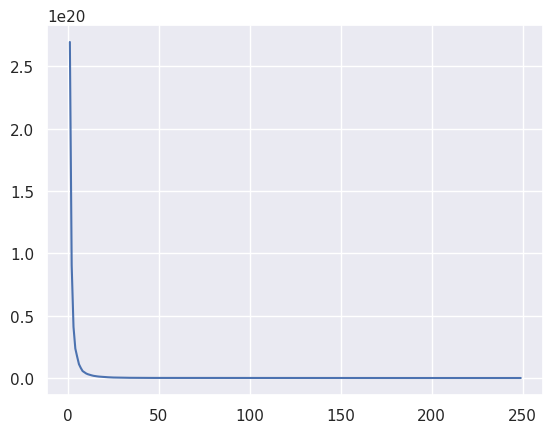

In [ ]:
sns.set()
plt.plot(range(1,250),All_wcss)
plt.plot()

[]

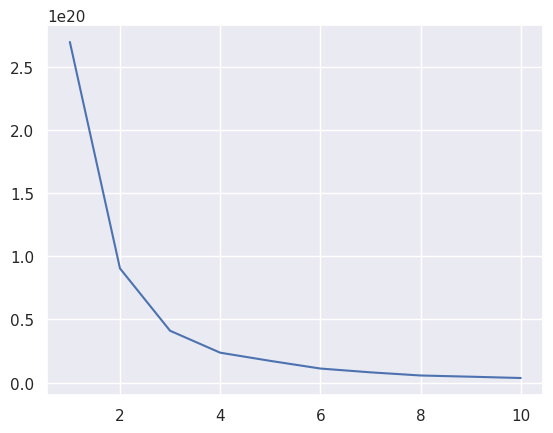

In [ ]:
sns.set()
plt.plot(range(1,11),All_wcss[0:10])
plt.plot()

In [ ]:
model=KMeans(8)
model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
identify_cluster=model.fit_predict(data)
identify_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([6, 6, 4, 4, 7, 1, 4, 4, 0, 1, 5, 6, 7, 7, 3, 6, 1, 4, 6, 0, 0, 6,
       6, 0, 7, 0, 0, 0, 7, 7, 7, 4, 7, 0, 0, 6, 5, 4, 7, 6, 0, 0, 7, 3,
       7, 0, 0, 6, 5, 2, 0, 7, 7, 6, 0, 1, 0, 4, 7, 5, 6, 6, 6, 0, 0, 5,
       1, 7, 7, 6, 7, 3, 3, 3, 7, 7, 7, 7, 7, 4, 7, 7, 3, 7, 7, 7, 7, 7,
       0, 0, 7, 3, 1, 4, 7, 7, 3, 7, 7, 4, 7, 7, 3, 6, 0, 7, 6, 0, 7, 1,
       0, 5, 3, 7, 7, 7, 7, 3, 3, 7, 3, 0, 7, 6, 4, 0, 7, 7, 7, 7, 6, 4,
       0, 7, 7, 1, 1, 3, 3, 3, 6, 3, 3, 3, 7, 0, 3, 3, 3, 7, 7, 3, 3, 7,
       7, 0, 7, 7, 3, 0, 0, 7, 0, 6, 4, 6, 7, 7, 7, 0, 7, 0, 7, 0, 7, 0,
       6, 7, 0, 6, 6, 3, 7, 0, 7, 7, 4, 3, 7, 0, 7, 7, 0, 4, 2, 6, 4, 3,
       7, 1, 3, 3, 3, 3, 6, 3, 7, 7, 7, 3, 3, 3, 7, 7, 3, 3, 3, 3, 7, 3,
       3, 7, 3, 7, 7, 7, 7, 0, 4, 0, 5, 3, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3,
       3, 3, 7, 7, 4, 3, 3], dtype=int32)

In [ ]:
data["cluster"]=identify_cluster
data

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,cluster
Date,,,,,,,,,,,,,
22-Mar-2024,1133.95,1140.00,1119.00,1133.95,1123.70,1122.75,1125.02,1269.00,690.0,1696377.0,1.908459e+09,70308.0,6
21-Mar-2024,1134.00,1138.95,1121.50,1124.05,1136.00,1133.95,1132.27,1269.00,690.0,1901034.0,2.152483e+09,73465.0,6
20-Mar-2024,1143.10,1153.40,1111.70,1146.25,1122.45,1124.05,1125.25,1269.00,690.0,2070193.0,2.329492e+09,104758.0,4
19-Mar-2024,1184.90,1184.90,1139.85,1186.95,1149.75,1146.25,1152.80,1269.00,690.0,2152306.0,2.481188e+09,109316.0,4
18-Mar-2024,1213.05,1217.65,1184.30,1212.15,1188.50,1186.95,1192.65,1269.00,690.0,803158.0,9.578829e+08,37164.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29-Mar-2023,696.05,703.00,694.80,696.05,698.00,697.55,698.82,861.15,686.6,1160832.0,8.112090e+08,45247.0,7
28-Mar-2023,690.00,699.65,690.00,699.35,696.00,696.05,696.35,861.15,686.6,1113702.0,7.755277e+08,31594.0,7
27-Mar-2023,706.90,707.40,697.20,702.35,697.45,699.35,705.43,861.15,686.6,3695292.0,2.606777e+09,32804.0,4


In [ ]:
data.cluster.value_counts()

7    89
3    54
0    41
6    27
4    19
1    10
5     7
2     2
Name: cluster, dtype: int64

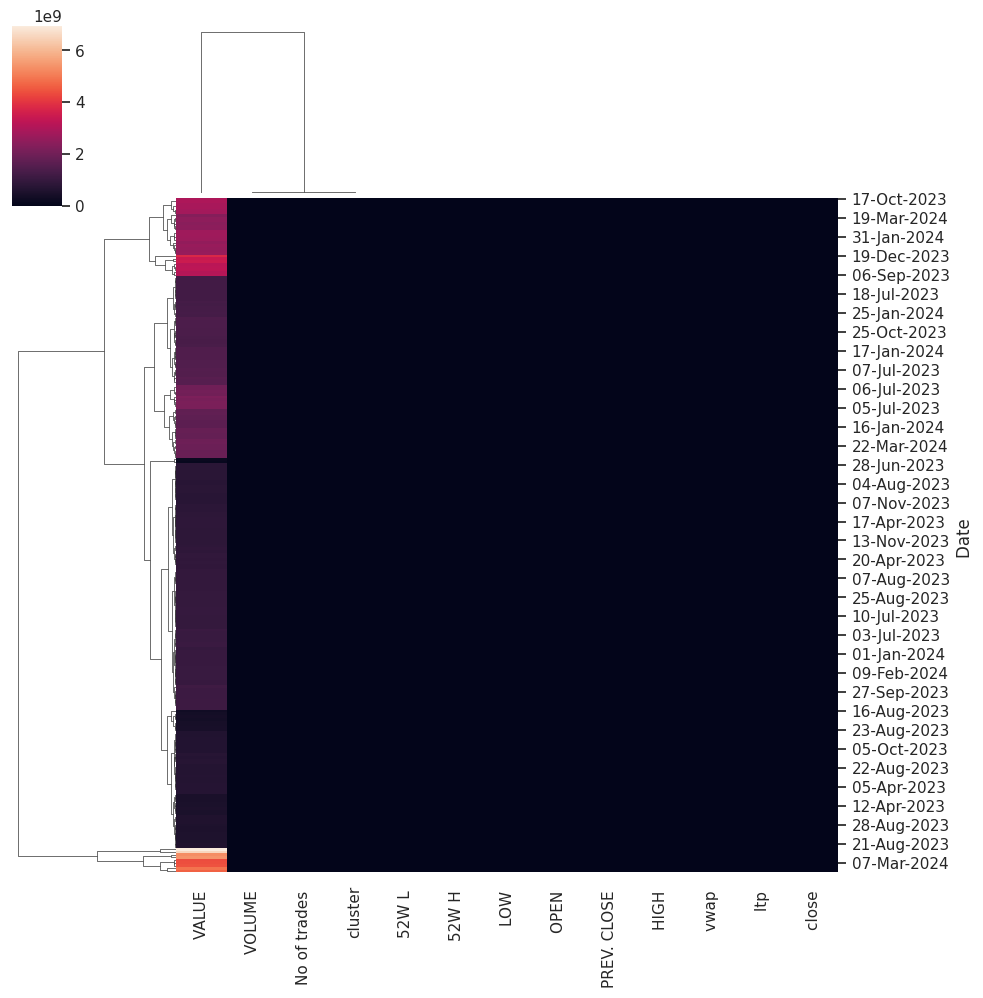

In [ ]:
sns.clustermap(data)